# Решение обыкновенных дифференциальных уравнений численными методами: сравнение подходов и реализаций

В качестве примера в данном ноутбуке предлагается модель логистического роста. Это очень простое и очень базовое дифференциальное уравнение. Оно встречается в огромном числе практических задач, например при описании роста популяции (людей, животных, вирусов и пр.), при моделировании экономических показателей и во многих других случаях. Также Вы *можете заменить логистическую функцию роста на своё любимое дифференциальное уравнение*.

Сегодня будем рассматривать базовые реализации "решателей" - реализаций методов решения ОДУ, доступных в популярных пакетах Python. 

Пакеты из раздела 5 имеют трудности при установке, поэтому этот раздел является дополнительным и приступать к нему следует в том случае, когда выполнены все остальные задания. Так, например, пакеты решения ОДУ в Python и многих других языках программирования (например, Julia, который мы рассмотрим в следующий раз) часто имеют зависимости от Fortran и пакета SUNDIALS. Установка этих библиотек имеет некоторые трудности при сборке и установке на различные окружения и операционные системы. Зависимости от Fortran в свою очередь любопытны производительностью и точностью получаемых решений.

**Содержание:**
- Разделы 1-4 показывают как работать с ОДУ в Python без использования специализированных библиотек. 
- Раздел 6 - это Ваше основное задание по практической работе.
- Раздел 5 - дополнительное исследовательское задание с использованием специализированных библиотек, визуализацией Manim и примером работы с системой дифференциальных уравнений в системной динамике. В задании 5.4. будет просто установить библиотеку и получить результат, а дополнительно приведена ссылка на сайт, где можно изучить использованную модель, поэтому даже если остальные задания раздела 5 выполнить не удаётся, тут вероятно всё получится.
- Раздел 7 предлагает некоторые дальнейшие упражнения для отработки практических навыков работы с ОДУ в Python.

**Настоятельная просьба выполнять работы самостоятельно**, а не заимствовать работы у коллег или AI-ассистентов. Только Вы ответственны за получаемые знания и свои интеллектуальные мускулы (не говоря уже о Кодексе студента ИТМО, за нарушение положений которого предполагается отвественность вплоть до отчисления). 

## 1. Постановка задачи: Модель логистического роста

Уравнение логистического роста моделирует динамику численности популяции в условиях ограниченных ресурсов. Оно задается формулой:

$$
\frac{dy}{dt} = r\, y \Bigl( 1 - \frac{y}{K} \Bigr),
$$

где

- **y(t)** - численность населения в момент времени *t*
- **r** - внутренняя скорость роста
- **K** - пропускная способность (ограничения ресурсов)

Аналитическим решением является:

$$
y(t) = \frac{K}{1+\Bigl(\frac{K-y_0}{y_0}\Bigr)e^{-r t}},
$$

Определим наши параметры и построим аналитическое решение.

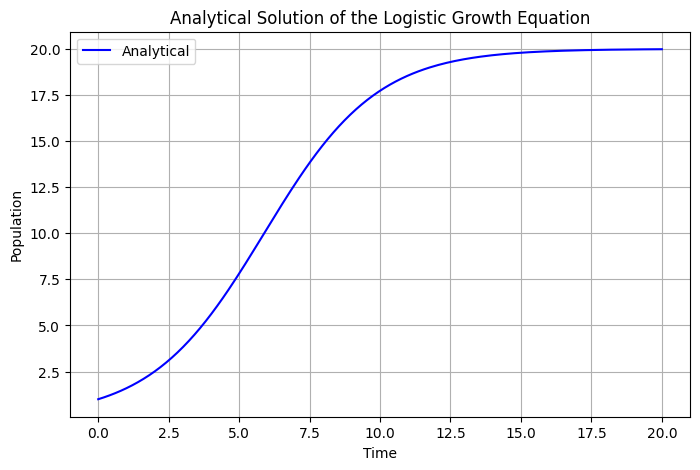

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define logistic growth parameters
r = 0.5         # Growth rate
K = 20          # Carrying capacity
y0 = 1          # Initial population

t_start = 0
t_end = 20
t_points = np.linspace(t_start, t_end, 200)

def analytical_solution(t, r, K, y0):
    return K / (1 + ((K - y0) / y0) * np.exp(-r * t))

y_analytical = analytical_solution(t_points, r, K, y0)

plt.figure(figsize=(8,5))
plt.plot(t_points, y_analytical, 'b-', label='Analytical')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Analytical Solution of the Logistic Growth Equation')
plt.legend()
plt.grid(True)
plt.show()


## 2. Пользовательские реализации решателей ОДУ

В этом разделе мы реализуем три метода:

* Метод Эйлера
* Улучшенный метод Эйлера (метод Хойна)
* Метод Рунге-Кутты 4-го порядка (RK4)

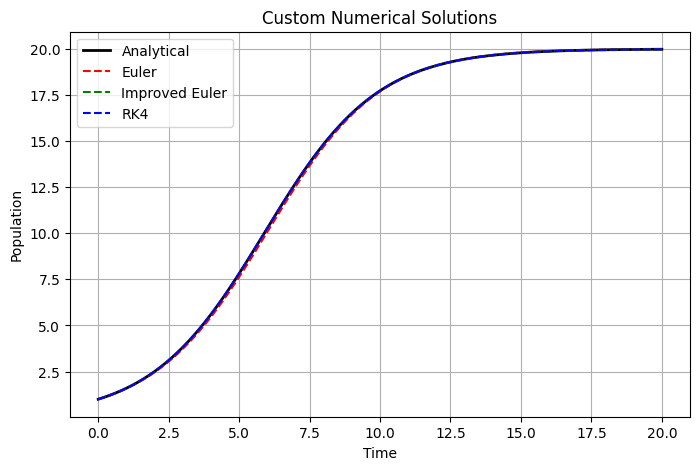

In [7]:
# The logistic derivative function
def logistic_deriv(t, y, r, K):
    return r * y * (1 - y / K)

# Euler method implementation
def euler_method(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * f(t[i-1], y[i-1], r, K)
    return y

# Improved Euler (Heun's) method implementation
def improved_euler(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i], y[i-1] + dt*k1, r, K)
        y[i] = y[i-1] + dt * 0.5 * (k1 + k2)
    return y

# 4th-Order Runge-Kutta (RK4) implementation
def runge_kutta4(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1, r, K)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2, r, K)
        k4 = f(t[i], y[i-1] + dt*k3, r, K)
        y[i] = y[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Solve the logistic ODE using the custom methods
y_euler = euler_method(logistic_deriv, t_points, y0, r, K)
y_improved = improved_euler(logistic_deriv, t_points, y0, r, K)
y_rk4 = runge_kutta4(logistic_deriv, t_points, y0, r, K)

# Plot the numerical solutions vs. the analytical solution
plt.figure(figsize=(8,5))
plt.plot(t_points, y_analytical, 'k-', lw=2, label='Analytical')
plt.plot(t_points, y_euler, 'r--', label='Euler')
plt.plot(t_points, y_improved, 'g--', label='Improved Euler')
plt.plot(t_points, y_rk4, 'b--', label='RK4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Custom Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()


## 3. Использование ODE-решателей SciPy

Программа solve_ivp от SciPy предоставляет надежные адаптивные решатели. В приведенной ниже ячейке решим логистическую задачу ODE, используя `RK45` (явный метод Рунге-Кутты), и отобразим результат.

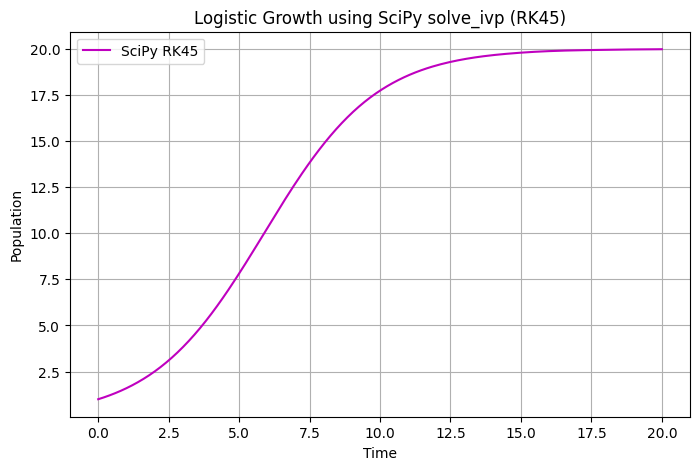

In [8]:
from scipy.integrate import solve_ivp

def logistic_ivp(t, y):
    return r * y * (1 - y / K)

sol = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_points, method='RK45')

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'm-', label='SciPy RK45')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Growth using SciPy solve_ivp (RK45)')
plt.legend()
plt.grid(True)
plt.show()


## 4. Аналитическое решение с помощью Sympy

Теперь решим задачу Коши для логистической функции роста символьно с помощью Sympy.

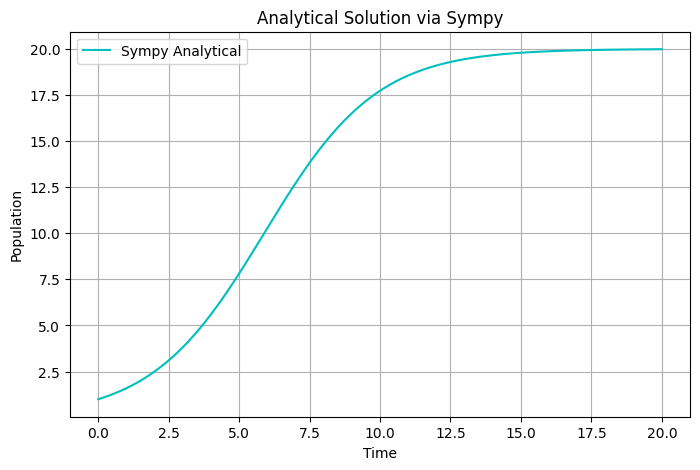

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t_sym = sp.symbols('t')
y_sym = sp.Function('y')(t_sym)

# Define the ODE in symbolic form
ode = sp.Eq(sp.diff(y_sym, t_sym), r * y_sym * (1 - y_sym/K))

# Solve the ODE symbolically
sol_sym = sp.dsolve(ode, y_sym, ics={y_sym.subs(t_sym, 0): y0})

# Convert the symbolic solution to a numerical function
sol_sym_func = sp.lambdify(t_sym, sol_sym.rhs, 'numpy') # Get the right-hand side of the equation

# Evaluate the numerical function at t_points
y_sol_sym = sol_sym_func(t_points)

plt.figure(figsize=(8,5))
plt.plot(t_points, y_sol_sym, 'c-', label='Sympy Analytical') # Plot the numerical solution
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Analytical Solution via Sympy')
plt.legend()
plt.grid(True)
plt.show()


## 5. * Использование других библиотек (опциональное задание)

В следующих разделах мы используем дополнительные библиотеки для решения логистической задачи ODE. Многие из этих пакетов особенно полезны в продвинутых приложениях (например, нейронные сети, крупномасштабное моделирование или гибридные подходы). 

### 5.1 Assimulo и scikits.odes

Фреймворк Assimulo (через scikits.odes) предоставляет доступ к решателям из пакета SUNDIALS. Если она у вас не установлена, запустите приведенную ниже ячейку.

Ниже приведен пример настройки с использованием scikits.odes.

In [ ]:
!pip install Assimulo

In [ ]:
!pip install scikits.odes

In [ ]:
try:
    from scikits.odes.ode import ode

    def f_scikits(t, y, r, K):
        return [r * y[0] * (1 - y[0] / K)]
    
    # Set up the solver using CVODE from the SUNDIALS suite
    solver = ode('cvode',
                 f_scikits,
                 rtol=1e-6,
                 atol=1e-6,
                 params=(r, K))
    
    result = solver.solve(t_points, [y0])
    y_scikits = np.array([pt[0] for pt in result.values])
    
    plt.figure(figsize=(8,5))
    plt.plot(result.times, y_scikits, 'orange', label='scikits.odes CVODE')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth via scikits.odes')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('scikits.odes is not installed. Please run: !pip install scikits.odes')


### 5.2 PyDSTool

PyDSTool - это комплексная среда для моделирования динамических систем. Если она не установлена, запустите ячейку ниже.

Далее приведен пример того, как определить и решить задачу Коши для логистической функции роста с помощью PyDSTool.

In [17]:
!pip install PyDSTool

   ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.4 MB ? eta -:--:--
   -------------- ------------------------- 1.6/4.4 MB 5.0 MB/s eta 0:00:01
   ----------------------- ---------------- 2.6/4.4 MB 5.3 MB/s eta 0:00:01
   ------------------------------ --------- 3.4/4.4 MB 4.3 MB/s eta 0:00:01
   --------------------------------- ------ 3.7/4.4 MB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 4.2/4.4 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 4.4/4.4 MB 3.1 MB/s eta 0:00:00


In [22]:
try:
    from PyDSTool import args, Generator

    # Define model parameters and initial condition
    pars = {'r': r, 'K': K}
    ics = {'y': y0}

    ds_args = args(name='LogisticModel')
    ds_args.pars = pars
    ds_args.varspecs = {'y': 'r*y*(1 - y/K)'}
    ds_args.ics = ics
    ds_args.tdomain = [t_start, t_end]

    ode_system = Generator.Vode_ODEsystem(ds_args)
    traj = ode_system.compute('test')
    pts = traj.sample()
    t_pydstool = pts['t']
    y_pydstool = pts['y']

    plt.figure(figsize=(8,5))
    plt.plot(t_pydstool, y_pydstool, 'purple', label='PyDSTool Vode')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth using PyDSTool')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('PyDSTool is not installed. Please run: !pip install PyDSTool')


PyDSTool is not installed. Please run: !pip install PyDSTool


### 5.3 Torchdiffeq

Torch diff eq - это библиотека для дифференцируемого решения ODE, полезная при интеграции с моделями нейронных сетей.

В приведенном ниже примере используется Torchdiffeq (совместно с PyTorch) для решения задачи Коши для логистической функции роста.

In [ ]:
!pip install torchdiffeq

In [ ]:
try:
    import torch
    from torchdiffeq import odeint as torch_odeint

    class LogisticODE(torch.nn.Module):
        def forward(self, t, y):
            return r * y * (1 - y / K)

    device = torch.device('cpu')
    y0_torch = torch.tensor([y0], dtype=torch.float32, device=device)
    t_torch = torch.linspace(t_start, t_end, steps=200, dtype=torch.float32, device=device)

    logistic_model = LogisticODE()
    y_torch = torch_odeint(logistic_model, y0_torch, t_torch, method='rk4')

    y_torch_np = y_torch.squeeze().cpu().numpy()

    plt.figure(figsize=(8,5))
    plt.plot(t_torch.cpu().numpy(), y_torch_np, 'brown', label='Torchdiffeq RK4')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth using Torchdiffeq')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('Torchdiffeq is not installed. Please run: !pip install torchdiffeq')


### 5.4. Системная динамика и PySD

PySD - это Open Source инструмент для расчёта моделей системной динамики, которые в основе своей представляют систему дифференциальных уравнений.

[Тут](#https://www.labxchange.org/library/items/lb:LabXchange:f223e947:lx_simulation:1?fullscreen=true) можно больше узнать про приведённую модель Лотки-Вольтерра, посмотреть графики, симуляции и сравнить решение.

In [ ]:
!pip install pysd==3.14.3

In [ ]:
!pip show pysd

In [ ]:
import pysd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Create the model file
# -------------------------------
model_definition = """
<xmile xmlns="http://docs.oasis-open.org/xmile/ns/XMILE/v1.0" version="1.0">
    <isee:prefs show_module_prefix="true" layer="model"/>
    <header>
        <options namespace="std"/>
        <vendor>Ventana Systems, xmutil</vendor>
        <product lang="en">Vensim, xmutil</product>
    </header>
    <sim_specs method="Euler" time_units="seasons" isee:sim_duration="0">
        <start>0</start>
        <stop>12</stop>
        <dt>0.03125</dt>
    </sim_specs>
    <model_units/>
    <dimensions/>
    <model>
        <variables>
            <flow name="prey deaths">
                <eqn>(prey_death_proportionality_constant*Predator_Population)*Prey_Population</eqn>
            </flow>
            <aux name="prey death proportionality constant">
                <eqn>0.035</eqn>
                <units>1</units>
            </aux>
            <flow name="prey births">
                <eqn>prey_birth_fraction*Prey_Population</eqn>
            </flow>
            <aux name="prey birth fraction">
                <eqn>1</eqn>
                <units>1</units>
            </aux>
            <flow name="predator deaths">
                <eqn>predator_death_proportionality_constant*Predator_Population</eqn>
            </flow>
            <flow name="predator births">
                <eqn>(predator_birth_fraction*Prey_Population)*Predator_Population</eqn>
            </flow>
            <stock name="Prey Population">
                <inflow>prey_births</inflow>
                <outflow>prey_deaths</outflow>
                <eqn>100</eqn>
            </stock>
            <aux name="predator death proportionality constant">
                <eqn>1</eqn>
                <units>1</units>
            </aux>
            <stock name="Predator Population">
                <inflow>predator_births</inflow>
                <outflow>predator_deaths</outflow>
                <eqn>15</eqn>
            </stock>
            <aux name="predator birth fraction">
                <eqn>0.01</eqn>
                <units>1</units>
            </aux>
        </variables>
    </model>
</xmile>

"""

model_filename = "lotka_volterra.xmile"
with open(model_filename, "w") as f:
    f.write(model_definition)

# -------------------------------
# 2. Load the model using PySD
# -------------------------------
model = pysd.read_xmile(model_filename)

# -------------------------------
# 3. Set simulation parameters
# -------------------------------
initial_time = 0      # Start time
final_time = 50       # End time
time_step = 0.1       # Simulation time step

# -------------------------------
# 4. Run simulation with different solvers
# -------------------------------
# Run simulation using the Euler integration method
results_euler = model.run(
    initial_condition="original",
    final_time=final_time,
    time_step=time_step
)

# print(results_euler)
print(type(results_euler))
print(results_euler.columns)


# -------------------------------
# 5. Plot the results
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(results_euler.index, results_euler['Prey Population'], label='Prey', linestyle='-')
plt.plot(results_euler.index, results_euler['Predator Population'], label='Predator', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Dynamics')
plt.legend()
plt.grid(True)
plt.show()

### 5.5 Визуализация Manim

В этом разделе мы используем библиотеку Minim для создания динамической визуализации решения по развитию логистики. В анимации будет отображаться логистическая кривая вместе с движущейся точкой, которая отслеживает её изменение с течением времени.

Мы будем использовать сцену Manim для анимации процесса решения задачи Коши.

In [ ]:
!pip install manim

In [ ]:
%%manim -ql -v WARNING LogisticGrowthScene

from manim import *
import numpy as np

class LogisticGrowthScene(Scene):
    def construct(self):
        # Parameters
        r = 0.5
        K = 20
        y0 = 1
        t_end = 20
        
        # Setup axes
        axes = Axes(
            x_range=[0, t_end, 5],
            y_range=[0, K+5, 5],
            x_length=10,
            y_length=6,
            axis_config={"include_numbers": True},
            tips=True
        ).to_edge(DOWN)
        
        # Define the logistic function
        logistic = lambda t: K / (1 + ((K - y0) / y0) * np.exp(-r * t))
        
        # Create axes and plot the logistic curve
        self.play(Create(axes))
        graph = axes.plot(logistic, color=BLUE)
        self.play(Create(graph))
        
        # Introduce a dot that will trace the logistic curve
        dot = Dot(color=RED).move_to(axes.c2p(0, logistic(0)))
        self.add(dot)
        
        dot_tracker = ValueTracker(0)
        dot.add_updater(lambda m: m.move_to(axes.c2p(dot_tracker.get_value(), logistic(dot_tracker.get_value()))))
        
        self.play(dot_tracker.animate.set_value(t_end), run_time=6, rate_func=linear)
        self.wait()


## 6. Сравнение и размышление

### 6.1 Численный анализ методов и реализаций
Теперь, когда Вы рассчитали решение для логистического роста несколькими методами, обратите внимание (*напишите код в ячейке ниже и составьте таблицу или графики с полученными результатами*) на следующее:

- **Точность:** Насколько близко численные методы подходят к аналитическому решению?
- **Стабильность и сходимость:** Как проявляются ошибки при изменении размера шага или допусков?
- **Скорость работы метода и реализации:** Сравните низкоуровневые пользовательские реализации с высокоуровневыми библиотечными интерфейсами.

Сделано, смотрите ниже

### 6.2. Вопросы для размышления:

1. Какие преимущества дают адаптивные решатели (например, в SciPy) по сравнению с методами с фиксированным шагом?
- Реальный шаг подбирают сами методы, следовательно, нам нет необходимости тратить время на подбор оптимального шага. Более того, в силу того, что зависимости от фиксированного нами шага нет - получается стабильно более точный результат без резкого увеличения времени выполнения метода.
2. Можете ли Вы определить ситуации, когда простой метод (например, Эйлера) может привести к недопустимому росту ошибок?
- Если в какой-то момент график функции начинает резко возрастать или убывать. И если шаг будет слишком большим - изменение адекватно мы "поймать" не сможем. Отсюда накопится очень большая ошибка.
3. Как выбор жесткого решателя помогает при работе с более сложными ОДУ?
- Жесткие решатели могут выбирать маленький или большой шаг в зависимости от поведения функции. Это решает проблему, описанный в прошлом вопросе

Смело экспериментируйте с различными значениями параметров (например, с большей скоростью роста *r*) и наблюдайте за их влиянием на решение. Также Вы можете заменить логистическую функцию роста на своё любимое дифференциальное уравнение.

Результаты для шага: 50
           Method  Steps  Max Error  Runtime (s)
0           Euler     50   0.841647     0.000221
1  Improved Euler     50   0.050820     0.000325
2             RK4     50   0.000072     0.001075
3           SciPy     50   0.008125     0.029336
4           SymPy     50   0.000000     0.000023


Результаты для шага: 100
           Method  Steps  Max Error  Runtime (s)
5           Euler    100   0.418088     0.000308
6  Improved Euler    100   0.013149     0.000540
7             RK4    100   0.000005     0.001747
8           SciPy    100   0.008153     0.005467
9           SymPy    100   0.000000     0.000102


Результаты для шага: 500
            Method  Steps     Max Error  Runtime (s)
10           Euler    500  8.315815e-02     0.002327
11  Improved Euler    500  5.409078e-04     0.003444
12             RK4    500  7.367122e-09     0.006346
13           SciPy    500  8.154164e-03     0.006185
14           SymPy    500  0.000000e+00     0.000588


Результаты для

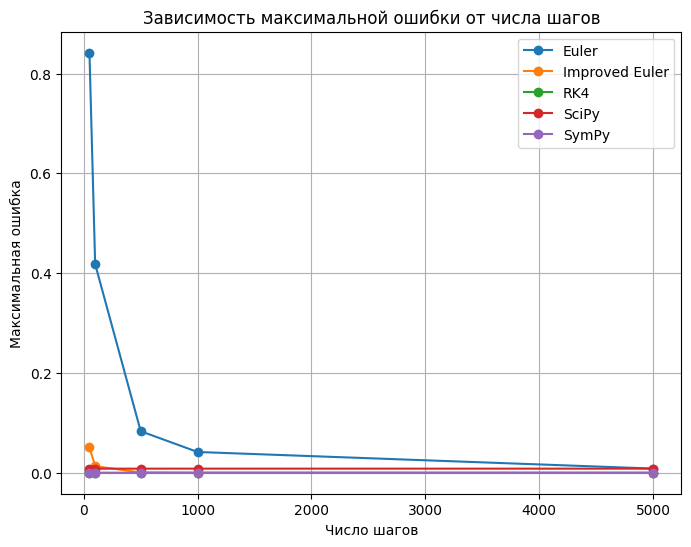

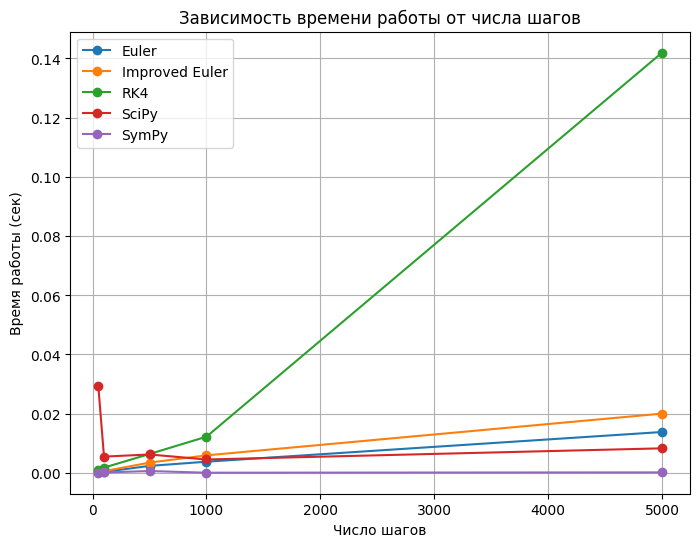

In [35]:
# 6.1
import time
import pandas as pd

step_list = [50, 100, 500, 1000, 5000]
results = []

for steps in step_list:
    t_grid = np.linspace(t_start, t_end, steps)

    # Эйлера
    t0 = time.perf_counter()
    y_eul = euler_method(logistic_deriv, t_grid, y0, r, K)
    runtime_euler = time.perf_counter() - t0
    error_euler = np.max(np.abs(analytical_solution(t_grid, r, K, y0) - y_eul))
    results.append({'Method': 'Euler', 'Steps': steps, 'Max Error': error_euler, 'Runtime (s)': runtime_euler})

    # улучшенный Эйлера (Хойна)
    t0 = time.perf_counter()
    y_heun = improved_euler(logistic_deriv, t_grid, y0, r, K)
    runtime_heun = time.perf_counter() - t0
    error_heun = np.max(np.abs(analytical_solution(t_grid, r, K, y0) - y_heun))
    results.append({'Method': 'Improved Euler', 'Steps': steps, 'Max Error': error_heun, 'Runtime (s)': runtime_heun})

    # Рунге-Кутты
    t0 = time.perf_counter()
    y_rk4 = runge_kutta4(logistic_deriv, t_grid, y0, r, K)
    runtime_rk4 = time.perf_counter() - t0
    error_rk4 = np.max(np.abs(analytical_solution(t_grid, r, K, y0) - y_rk4))
    results.append({'Method': 'RK4', 'Steps': steps, 'Max Error': error_rk4, 'Runtime (s)': runtime_rk4})

    # SciPy (да, не зависит, но мне не хочется выравнивать таблички)
    t0 = time.perf_counter()
    y_sci = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_grid, method='RK45')
    runtime_ivp = time.perf_counter() - t0
    error_ivp = np.max(np.abs(analytical_solution(y_sci.t, r, K, y0) - y_sci.y[0]))
    results.append({'Method': 'SciPy', 'Steps': steps, 'Max Error': error_ivp, 'Runtime (s)': runtime_ivp})

    # SymPy (аналогично)
    t0 = time.perf_counter()
    y_sym_eval = sol_sym_func(t_grid)
    runtime_sym = time.perf_counter() - t0
    error_sym = np.max(np.abs(analytical_solution(t_grid, r, K, y0) - y_sym_eval))
    results.append({'Method': 'SymPy', 'Steps': steps, 'Max Error': error_sym, 'Runtime (s)': runtime_sym})

# Формируем таблицу результатов
df_results = pd.DataFrame(results, columns=["Method", "Steps", "Max Error", "Runtime (s)"])

for steps in sorted(df_results["Steps"].unique()):
    df_step = df_results[df_results["Steps"] == steps]
    print(f"Результаты для шага: {steps}")
    print(df_step)
    print("\n")

plt.figure(figsize=(8,6))
methods = ['Euler', 'Improved Euler', 'RK4', 'SciPy', 'SymPy']

for method in methods:
    sub_df = df_results[df_results["Method"] == method]
    plt.plot(sub_df["Steps"], sub_df["Max Error"], marker='o', label=method)
plt.xlabel('Число шагов')
plt.ylabel('Максимальная ошибка')
plt.title('Зависимость максимальной ошибки от числа шагов')
plt.legend()
plt.grid(True)
plt.show()

# График зависимости времени работы от числа шагов (линейная шкала)
plt.figure(figsize=(8,6))
for method in methods:
    sub_df = df_results[df_results["Method"] == method]
    plt.plot(sub_df["Steps"], sub_df["Runtime (s)"], marker='o', label=method)
plt.xlabel('Число шагов')
plt.ylabel('Время работы (сек)')
plt.title('Зависимость времени работы от числа шагов')
plt.legend()
plt.grid(True)
plt.show()

## 7. * Дальнейшее изучение

Для дальнейшего изучения вы можете:

- Реализовать самостоятельно и сравнить дополнительные методы, такие как метод Милна, методы Адамса-Мультона или Адамса-Башфорта.
- Изучить влияние изменений параметров или использовать зашумленные данные для оценки параметров.
- Подумайте о том, чтобы распространить эти идеи на уравнения в частных производных или системы ОДУ в будущих проектах.

Продуктивного программирования и погружения в задачу!